# Purpose
The purpose of this test is to verify that the WigSample algorithm is working correctly. This will be verified with distribution analysis, including chi-squared goodness of fit on the level-spacing distribution. The log-probability of sampling such a distribution should form a Gaussian-like distribution about the expected log-likelihood.

...

# Importing Modules

In [1]:
from ATARI.TAZ import TAZ

from ATARI.ModelData.particle import Particle, Neutron

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=20, linewidth=130)

In [2]:
# %matplotlib widget

# Bayes Sampler Test

#### Defining Mean Parameters

In [3]:
# Particle Types:
Target = Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = Neutron

# Mean Parameters
# EB = (1e-5,1000)
# false_dens = 1/20
# lvl_dens  = [1/8, 1/12]
# # gn2m  = [44.11355, 33.38697]
# gn2m  = [400, 600]
# gg2m   = [55.00000, 55.00000]
# dfn   = [1, 1]
# dfg   = [250, 250]
# l     = [0, 0]
# j     = [3.0, 4.0]

EB = (1e-5,2000)
false_dens = 1/30
lvl_dens  = [1/4.3166, 1/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sample Resonances

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

#### Running WigSample

In [5]:
num_trials = 100 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior)
Samples = runMaster.WigSample(num_trials)

In [6]:
print(np.bincount(Samples.reshape(-1,), minlength=3))

[46344 46486  6870]


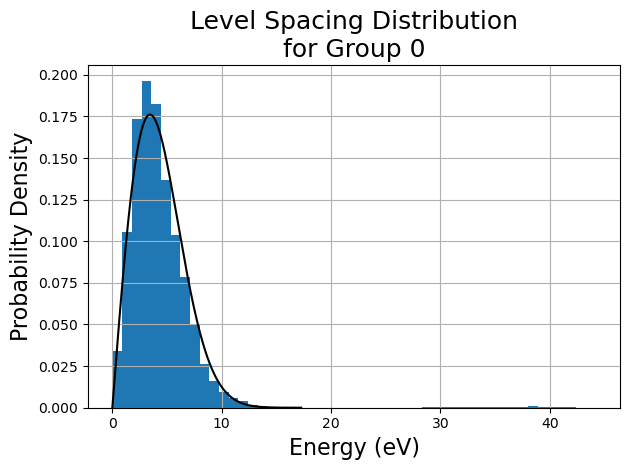

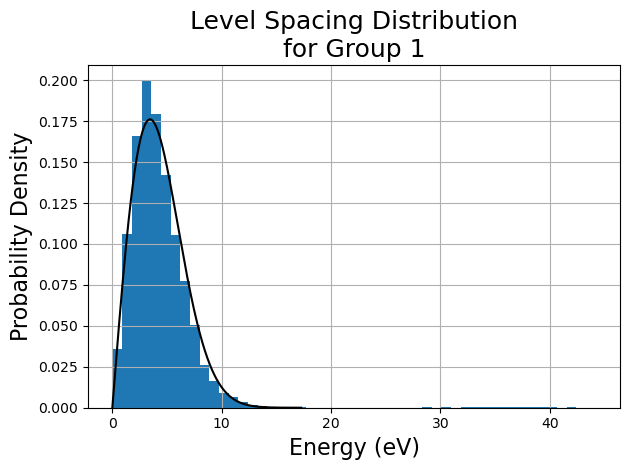

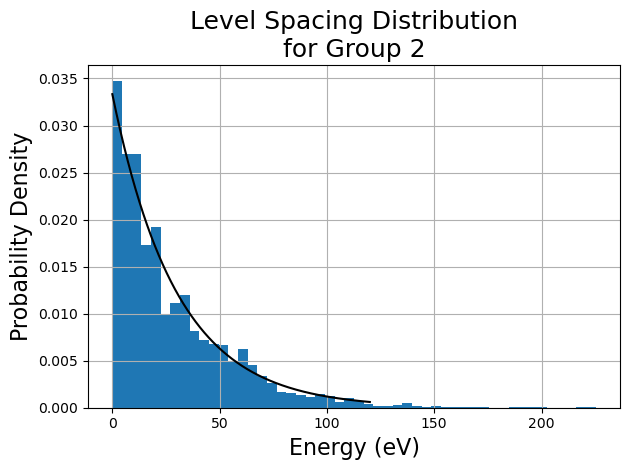

In [7]:
for g in range(3):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(100+g)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:
print(np.bincount(Samples.reshape(-1,), minlength=3))

[46344 46486  6870]


In [9]:
EB = (1e-5,2000)
false_dens = 1/8.0
lvl_dens  = [1/4.0]
gn2m  = [44.11355]
gg2m   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)
Res, Types, Missed_Res, Missed_Types = reaction.sample()
num_trials = 100 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior)
Samples = runMaster.WigSample(num_trials)

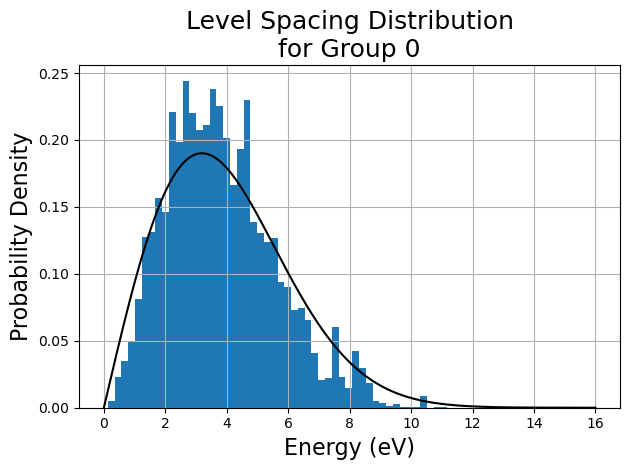

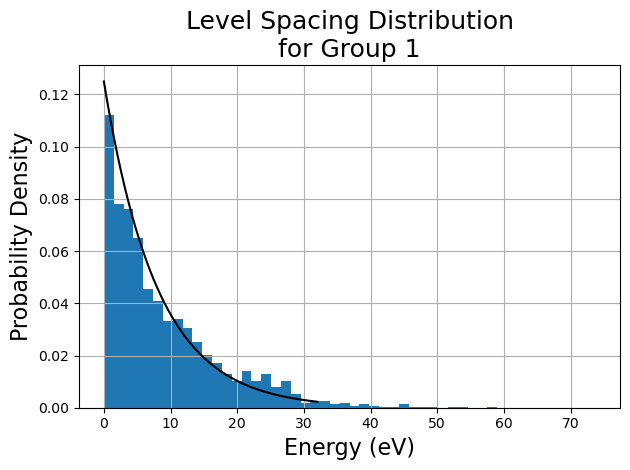

In [10]:
for g in range(2):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(200+g)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()

# Log Likelihood Test

...